# Inferential Statistics

In this notebook we
1. Load '../Data/data_eda.csv' which is the output of exploratory data analysis.
2. Apply inferential statistics to the following questions in Seattle Airbnb listing data.
 * Are there variables that are particularly significant in terms of Seattle Airbnb listing price?
 * Are there strong correlations between pairs of independent variables?
 * Are there strong correlation between an independent and a dependent variable? 

### Import Packages

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style("whitegrid")
palette = sns.diverging_palette(220, 20, sep = 20, n = 150)
sns.set_palette(palette)

### Load Data

In [2]:
df = pd.read_csv('../Data/data_eda.csv')
df.head()

,price,neighbourhood_cleansed,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,cancellation_policy,cleaning_fee,latitude_longitude_bin,neighbourhood_cleansed_reverted,shapes,accommodates_bedroom_ratio,accommodates_bathroom_ratio
0,85.0,81,14,0,0,4,1.0,1.0,1.0,4,2,1,61.710904,4,West Queen Anne,"Poly((9278.77, 24876.6) ...)",4.0,4.000000
1,150.0,81,14,0,0,4,1.0,1.0,1.0,4,1,2,40.000000,4,West Queen Anne,"Poly((9278.77, 24876.6) ...)",4.0,4.000000
2,975.0,81,14,9,0,11,4.5,5.0,7.0,4,10,2,300.000000,4,West Queen Anne,"Poly((9278.77, 24876.6) ...)",2.2,2.444444
3,100.0,81,14,0,0,3,1.0,0.0,2.0,4,1,0,61.710904,4,West Queen Anne,"Poly((9278.77, 24876.6) ...)",6.0,3.000000
4,450.0,81,14,9,0,6,2.0,3.0,3.0,4,6,2,125.000000,4,West Queen Anne,"Poly((9278.77, 24876.6) ...)",2.0,3.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 18 columns):
price                              3818 non-null float64
neighbourhood_cleansed             3818 non-null int64
zipcode                            3818 non-null int64
property_type                      3818 non-null int64
room_type                          3818 non-null int64
accommodates                       3818 non-null int64
bathrooms                          3818 non-null float64
bedrooms                           3818 non-null float64
beds                               3818 non-null float64
bed_type                           3818 non-null int64
guests_included                    3818 non-null int64
cancellation_policy                3818 non-null int64
cleaning_fee                       3818 non-null float64
latitude_longitude_bin             3818 non-null int64
neighbourhood_cleansed_reverted    3818 non-null object
shapes                             3818 non-null object
a

### Prepare functions for Plotting

In [4]:
def get_sub_plot(width = 20, height = 10, label_font_size = 14, tick_font_size = 13):
    fig, ax = plt.subplots()
    fig.set_size_inches(width, height)
    ax.tick_params(labelsize = tick_font_size)
    ax.set_xlabel(ax.get_xlabel(), fontsize = label_font_size)
    ax.set_ylabel(ax.get_ylabel(), fontsize = label_font_size)
    return ax

def plot_joint_plot(x, y, df):
    #ax = get_sub_plot()
    sns.jointplot(x = x, y = y, data = df, kind = 'reg')
    plt.show()
    
def plot_box_plot(x, y, data):
    ax = get_sub_plot()
    sns.boxplot(x = x, y = y, data = df, ax = ax)
    plt.show()

### Questions 1: Are there variables that are particularly significant in terms of predicting Seattle Airbnb listing price?

### Assuming listing price is porportional to accommodates, bedrooms, bathrooms. Let's verify.

In [5]:
df.columns

Index(['price', 'neighbourhood_cleansed', 'zipcode', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'guests_included', 'cancellation_policy', 'cleaning_fee',
       'latitude_longitude_bin', 'neighbourhood_cleansed_reverted', 'shapes',
       'accommodates_bedroom_ratio', 'accommodates_bathroom_ratio'],
      dtype='object')

In [6]:
from scipy import stats

def report_pearson(x, y, data):
    correlation, p = stats.pearsonr(df[x], df[y])
    print('{:10s} {:10.2f} {:10.2f}'.format('pearson', correlation, p))

def report_numerical_x_vs_numerical_y(variables, y, df):
    for var in variables:
        print(var + ':')
        report_pearson(var, y, df)
        plot_joint_plot(var, y, df)


accommodates:
pearson          0.65       0.00


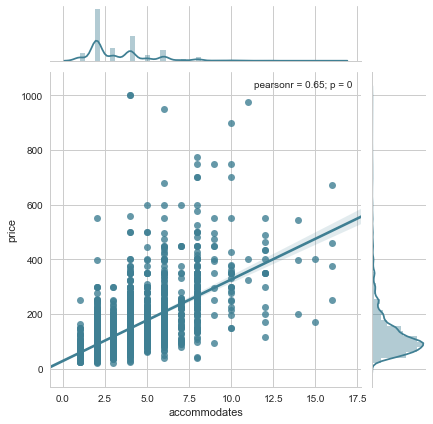

bedrooms:
pearson          0.63       0.00


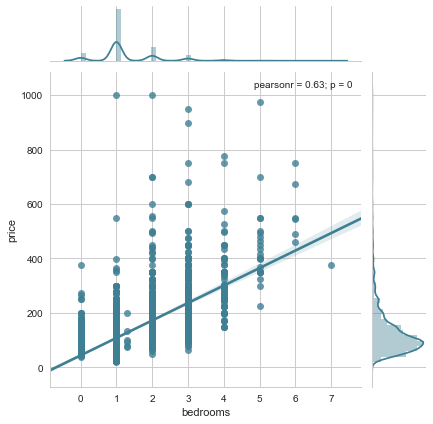

bathrooms:
pearson          0.52       0.00


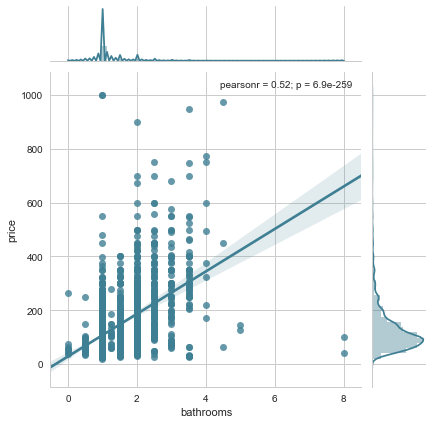

beds:
pearson          0.59       0.00


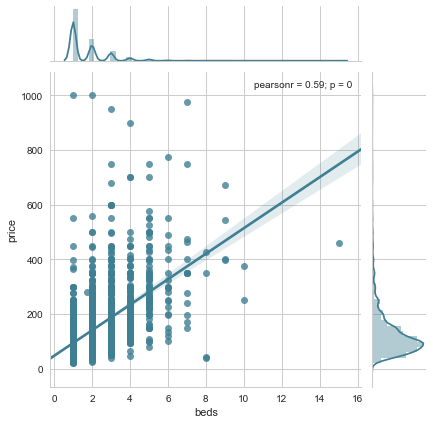

In [7]:
y = 'price'
variables = ['accommodates', 'bedrooms', 'bathrooms', 'beds']

report_numerical_x_vs_numerical_y(variables, y, df)

As we expected, accommodates, bedrooms, bathrooms, beds all have pearson's correlation coefficient > 0.5, which correlate well with listing price.

### Assuming listing price is correlated with property type & neighborhood. Let's verify.

In [8]:
import statsmodels.api as sm

def logistic_test(X, y, df):
    y = df[y] / np.max(df[y])

    logit_model = sm.Logit(y, X)
    result = logit_model.fit()
    print(result.summary2())

def report_categorical_x_vs_numerical_y(x, y, df):
    df_x_onehot = pd.get_dummies(df[x], prefix = x)
    logistic_test(X = df_x_onehot, y = y, df = df)
    plot_box_plot(x = x, y = y, data = df)

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.225470
         Iterations 7
                          Results: Logit
Model:                Logit            No. Iterations:   7.0000   
Dependent Variable:   price            Pseudo R-squared: 0.002    
Date:                 2018-05-01 22:31 AIC:              1755.6877
No. Observations:     3818             BIC:              1861.8949
Df Model:             16               Log-Likelihood:   -860.84  
Df Residuals:         3801             LL-Null:          -862.62  
Converged:            1.0000           Scale:            1.0000   
------------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025   0.975]
------------------------------------------------------------------
property_type_0  -1.9649   0.0737 -26.6652 0.0000  -2.1094 -1.8205
property_type_1  -2.0699   0.5212  -3.9716 0.0001  -3.0914 -1.0484
property_type_2  -0.9327   0.7854  -1.1876 0.2350  -2

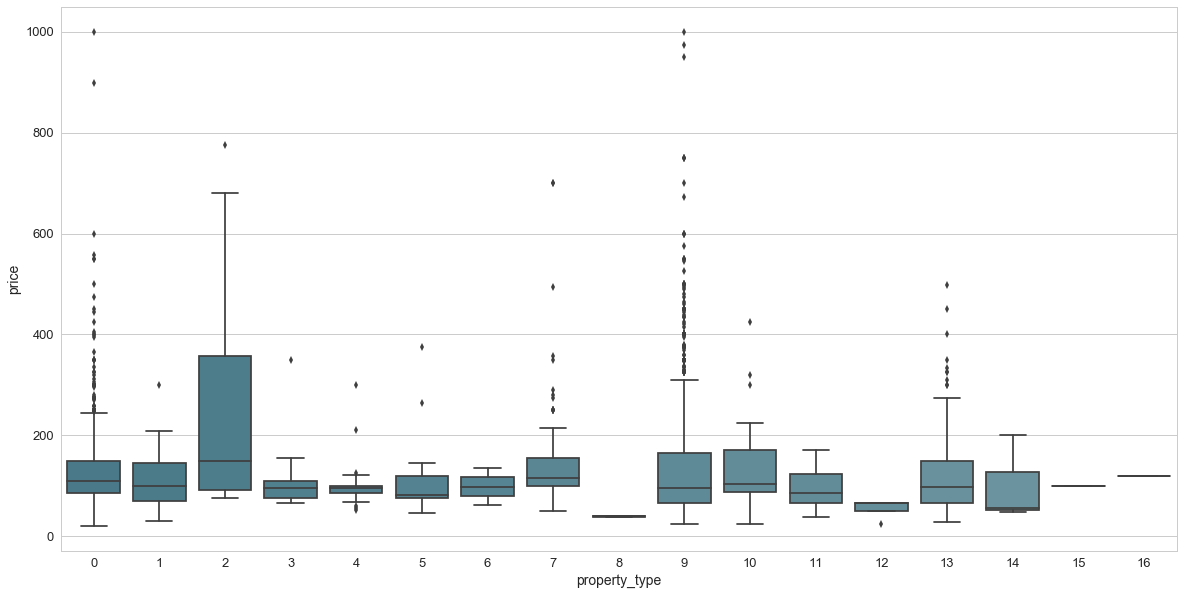

In [9]:
report_categorical_x_vs_numerical_y(x = 'property_type', y = 'price', df = df)

According to above summary, property_type 0, 1, 3, 4, 5, 7, 9, 10, 11, 13 have p-value less than 0.05 so they do correlate with price.

Optimization terminated successfully.
         Current function value: 0.224367
         Iterations 7
                              Results: Logit
Model:                  Logit               No. Iterations:      7.0000   
Dependent Variable:     price               Pseudo R-squared:    0.007    
Date:                   2018-05-01 22:31    AIC:                 1887.2662
No. Observations:       3818                BIC:                 2430.7971
Df Model:               86                  Log-Likelihood:      -856.63  
Df Residuals:           3731                LL-Null:             -862.62  
Converged:              1.0000              Scale:               1.0000   
--------------------------------------------------------------------------
                           Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------
neighbourhood_cleansed_0  -1.9767   0.3656  -5.4064 0.0000 -2.6933 -1.2601
neighbourhood_cleansed_1  -1

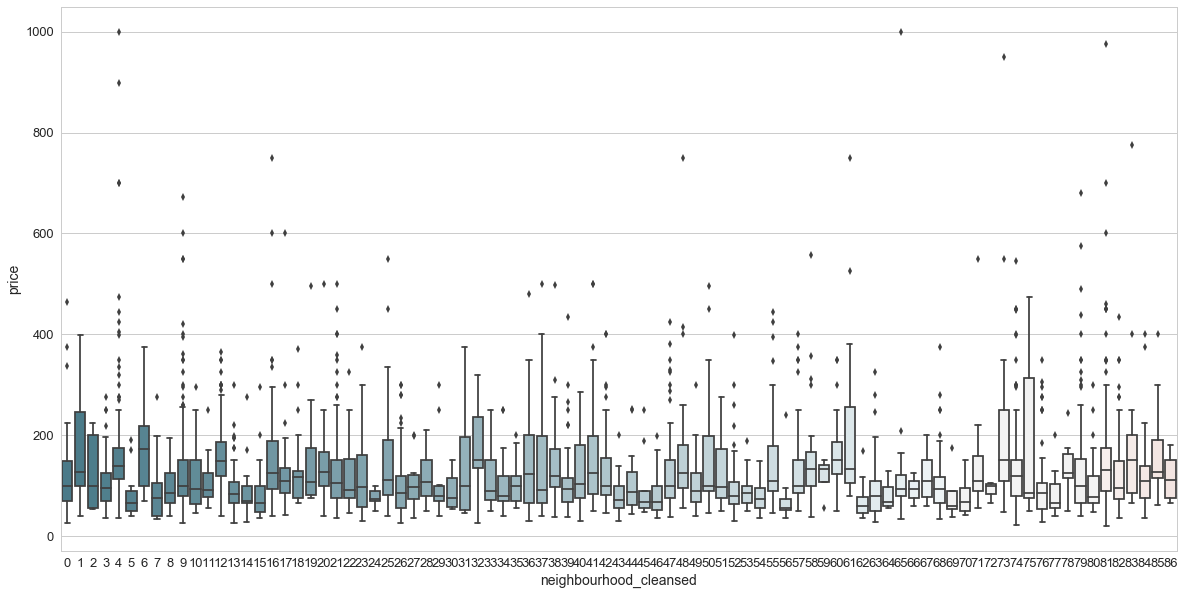

In [10]:
report_categorical_x_vs_numerical_y(x = 'neighbourhood_cleansed', y = 'price', df = df)

According to above summary, most of the neighborhood do correlate with price as their p-value is less than 0.05.

As we expected, property type & neighborhood are correlated with listing price.

### Question 2: Are there strong correlations between pairs of independent variables?

We have the following independent variables:
bedrooms, bathrooms, beds, accommodates, property_type, neighborhood.


Let's check the correlation between them:
1. bedrooms & bathrooms
2. bedrooms & beds.
3. bathrooms & beds.
4. beds & accommodates.
5. bedrooms & accommodates.
6. bathrooms & accommodates.
7. property & bedrooms.
8. property & beds.
9. property & bathromms.
10. property & accommodates.
11. neighbourhood_cleansed & bedrooms.
12. neighbourhood_cleansed & beds.
13. neighbourhood_cleansed & bathromms.
14. neighbourhood_cleansed & accommodates.

bedrooms:
pearson          0.61       0.00


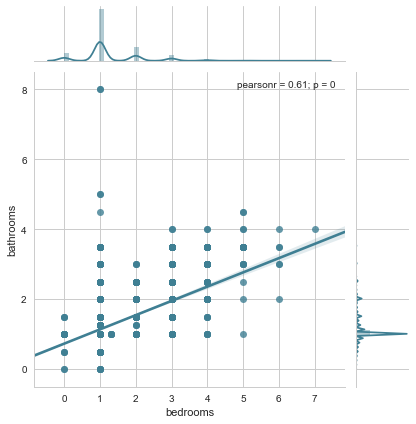

In [11]:
report_numerical_x_vs_numerical_y(['bedrooms'], 'bathrooms', df)

bedrooms:
pearson          0.75       0.00


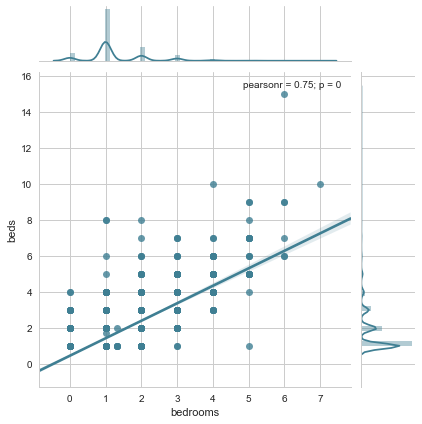

In [12]:
report_numerical_x_vs_numerical_y(['bedrooms'], 'beds', df)

bathrooms:
pearson          0.53       0.00


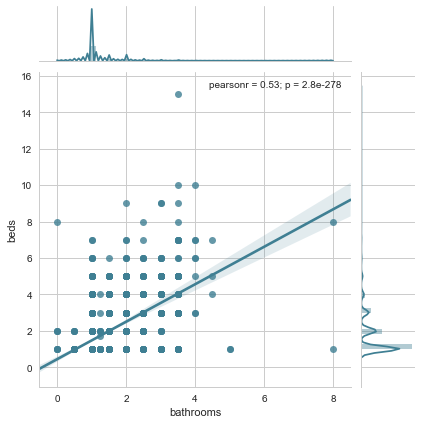

In [13]:
report_numerical_x_vs_numerical_y(['bathrooms'], 'beds', df)

beds:
pearson          0.86       0.00


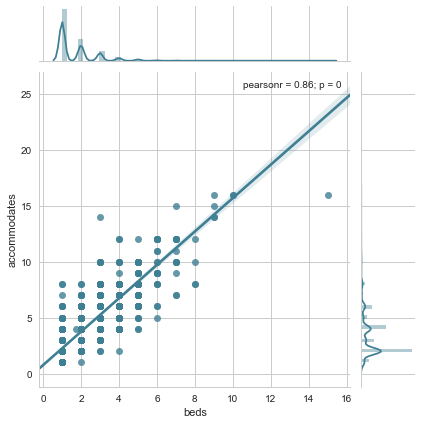

In [14]:
report_numerical_x_vs_numerical_y(['beds'], 'accommodates', df)

bedrooms:
pearson          0.77       0.00


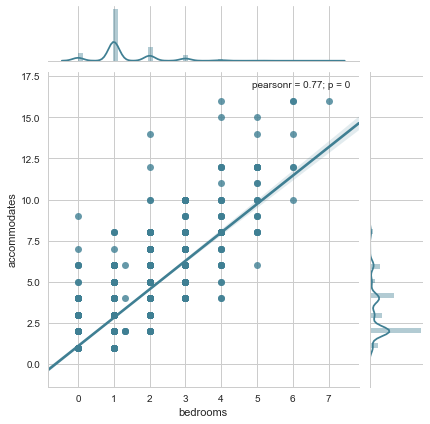

In [15]:
report_numerical_x_vs_numerical_y(['bedrooms'], 'accommodates', df)

bathrooms:
pearson          0.54       0.00


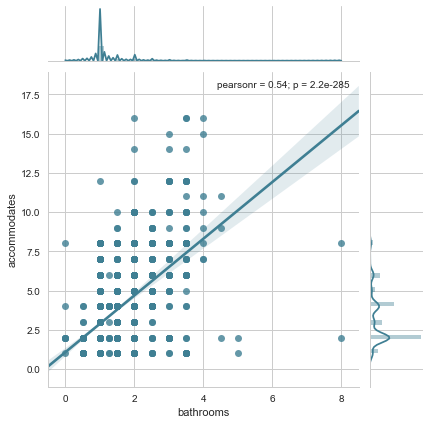

In [16]:
report_numerical_x_vs_numerical_y(['bathrooms'], 'accommodates', df)

         Current function value: 0.344486
         Iterations: 35
                               Results: Logit
Model:                   Logit                No. Iterations:       35.0000  
Dependent Variable:      bedrooms             Pseudo R-squared:     0.015    
Date:                    2018-05-01 22:31     AIC:                  2664.4957
No. Observations:        3818                 BIC:                  2770.7029
Df Model:                16                   Log-Likelihood:       -1315.2  
Df Residuals:            3801                 LL-Null:              -1335.6  
Converged:               0.0000               Scale:                1.0000   
-----------------------------------------------------------------------------
                  Coef.    Std.Err.     z     P>|z|     [0.025       0.975]  
-----------------------------------------------------------------------------
property_type_0   -1.7525     0.0682 -25.6999 0.0000      -1.8862     -1.6189
property_type_1   -1.7918     

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


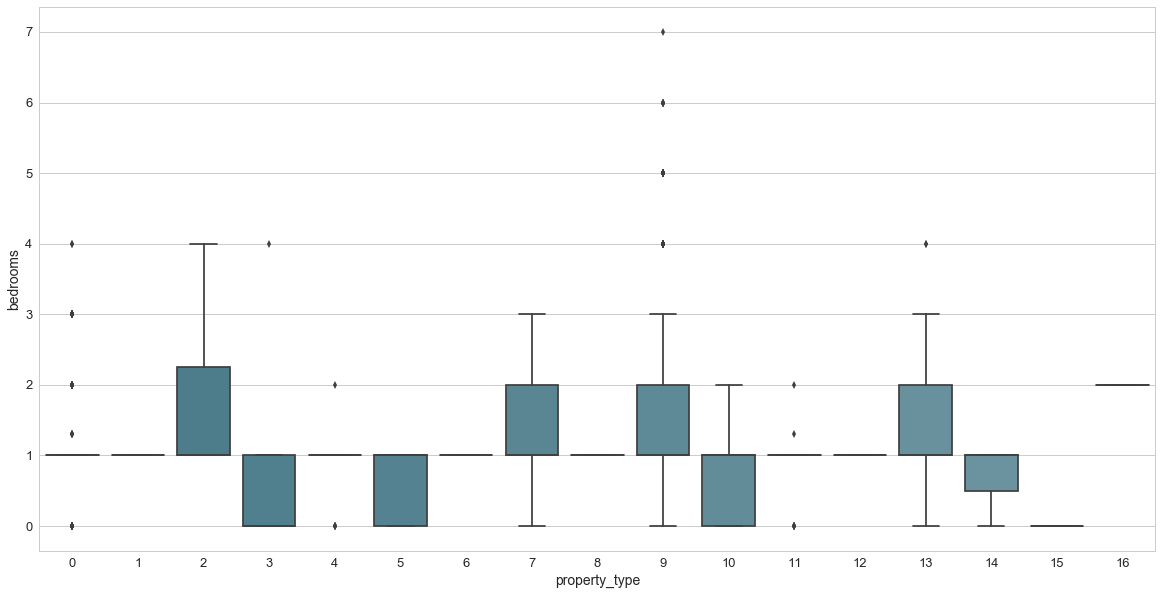

In [17]:
report_categorical_x_vs_numerical_y(x = 'property_type', y = 'bedrooms', df = df)

According to above summary, most of the property type do correlate with bedrooms as their p-value is less than 0.05.

Optimization terminated successfully.
         Current function value: 0.197400
         Iterations 7
                         Results: Logit
Model:               Logit            No. Iterations:   7.0000   
Dependent Variable:  beds             Pseudo R-squared: 0.003    
Date:                2018-05-01 22:31 AIC:              1541.3483
No. Observations:    3818             BIC:              1647.5555
Df Model:            16               Log-Likelihood:   -753.67  
Df Residuals:        3801             LL-Null:          -756.08  
Converged:           1.0000           Scale:            1.0000   
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
property_type_0  -2.1762   0.0800 -27.2086 0.0000 -2.3329 -2.0194
property_type_1  -2.3125   0.5742  -4.0274 0.0001 -3.4379 -1.1871
property_type_2  -1.7346   0.9901  -1.7519 0.0798 -3.6753  0.2061


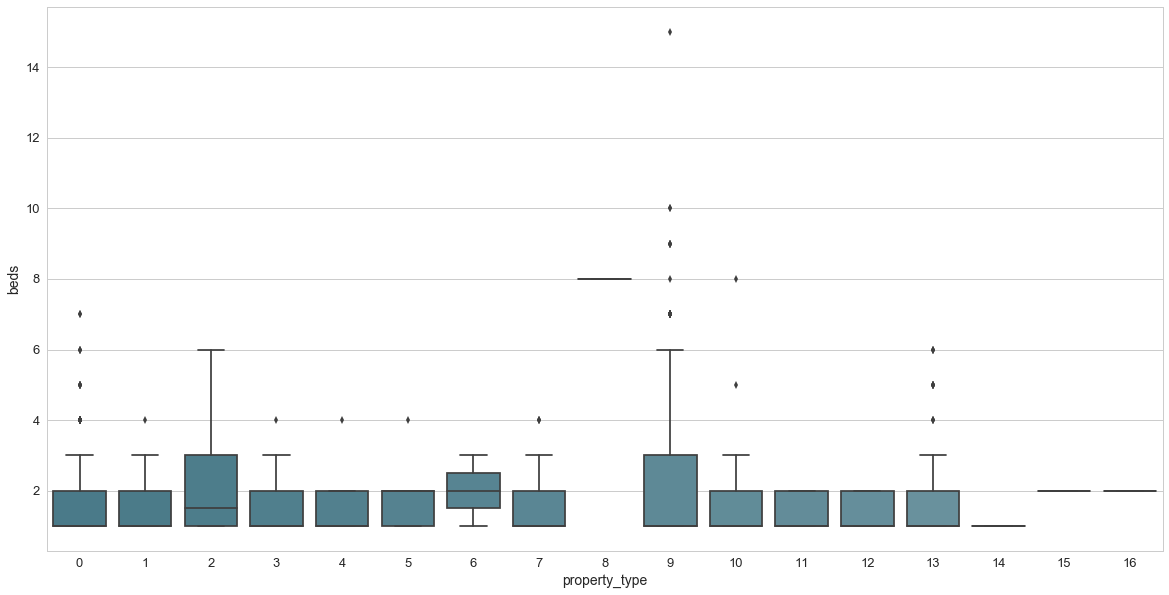

In [18]:
report_categorical_x_vs_numerical_y(x = 'property_type', y = 'beds', df = df)

Optimization terminated successfully.
         Current function value: 0.279875
         Iterations 7
                         Results: Logit
Model:               Logit            No. Iterations:   7.0000   
Dependent Variable:  bathrooms        Pseudo R-squared: 0.005    
Date:                2018-05-01 22:31 AIC:              2171.1279
No. Observations:    3818             BIC:              2277.3351
Df Model:            16               Log-Likelihood:   -1068.6  
Df Residuals:        3801             LL-Null:          -1074.3  
Converged:           1.0000           Scale:            1.0000   
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
property_type_0  -1.8395   0.0703 -26.1489 0.0000 -1.9773 -1.7016
property_type_1  -1.3487   0.4064  -3.3184 0.0009 -2.1453 -0.5521
property_type_2  -1.2730   0.8552  -1.4884 0.1366 -2.9492  0.4033


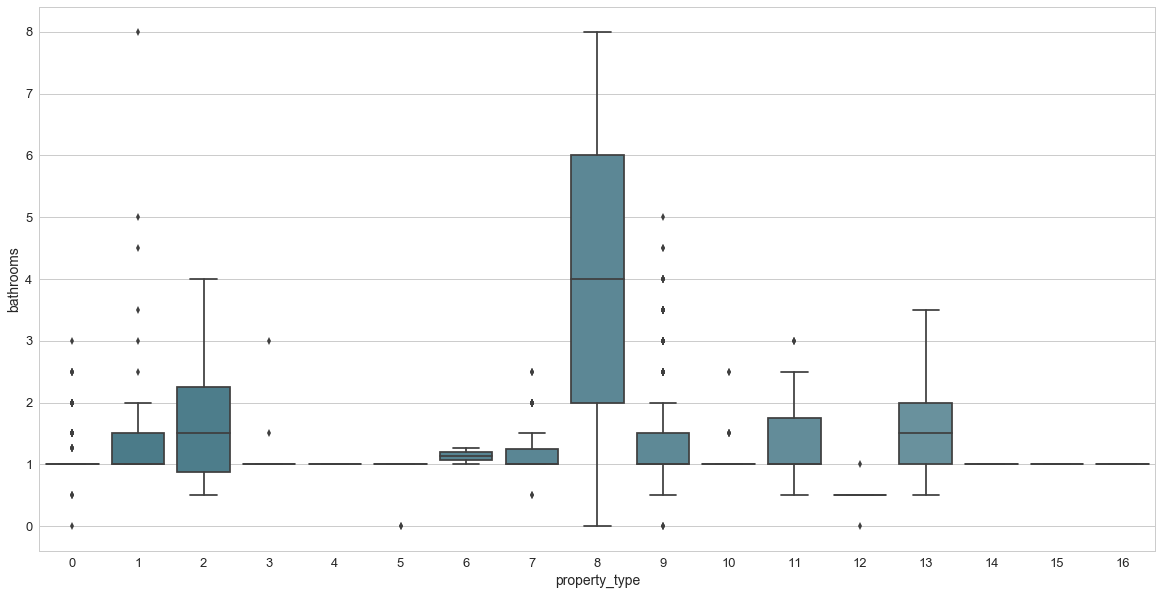

In [19]:
report_categorical_x_vs_numerical_y(x = 'property_type', y = 'bathrooms', df = df)

Optimization terminated successfully.
         Current function value: 0.390002
         Iterations 6
                         Results: Logit
Model:               Logit            No. Iterations:   6.0000   
Dependent Variable:  accommodates     Pseudo R-squared: 0.005    
Date:                2018-05-01 22:31 AIC:              3012.0536
No. Observations:    3818             BIC:              3118.2607
Df Model:            16               Log-Likelihood:   -1489.0  
Df Residuals:        3801             LL-Null:          -1496.0  
Converged:           1.0000           Scale:            1.0000   
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
property_type_0  -1.4234   0.0612 -23.2678 0.0000 -1.5433 -1.3035
property_type_1  -1.8277   0.4759  -3.8404 0.0001 -2.7605 -0.8949
property_type_2  -1.4159   0.8918  -1.5876 0.1124 -3.1638  0.3321


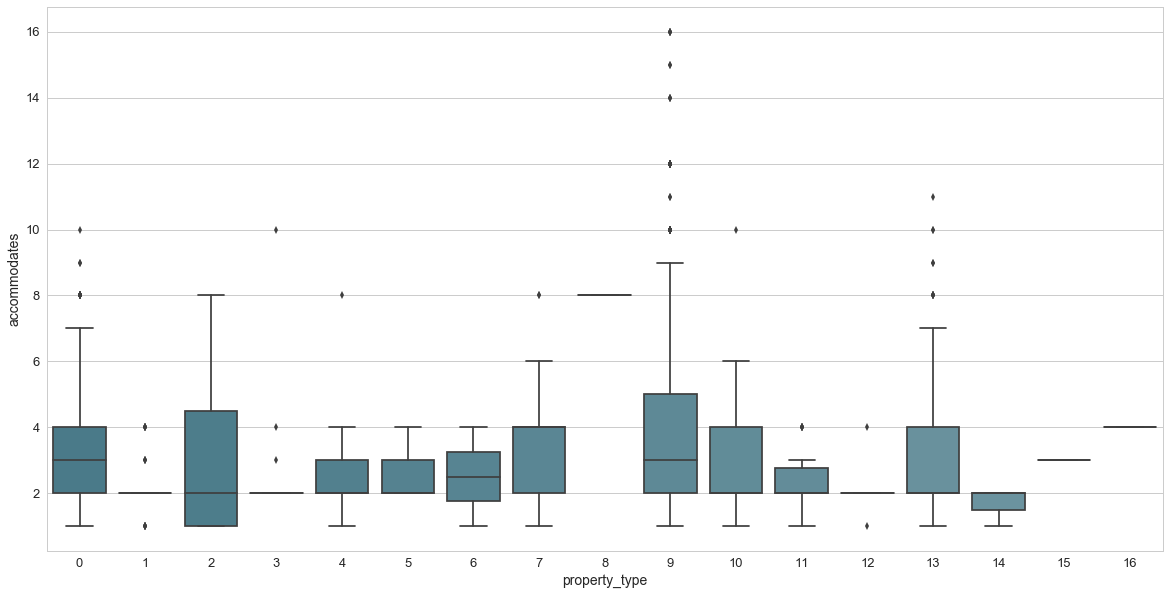

In [20]:
report_categorical_x_vs_numerical_y(x = 'property_type', y = 'accommodates', df = df)

Optimization terminated successfully.
         Current function value: 0.346329
         Iterations 6
                              Results: Logit
Model:                  Logit               No. Iterations:      6.0000   
Dependent Variable:     bedrooms            Pseudo R-squared:    0.010    
Date:                   2018-05-01 22:31    AIC:                 2818.5704
No. Observations:       3818                BIC:                 3362.1013
Df Model:               86                  Log-Likelihood:      -1322.3  
Df Residuals:           3731                LL-Null:             -1335.6  
Converged:              1.0000              Scale:               1.0000   
--------------------------------------------------------------------------
                           Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------
neighbourhood_cleansed_0  -1.3736   0.2977  -4.6144 0.0000 -1.9570 -0.7902
neighbourhood_cleansed_1  -1

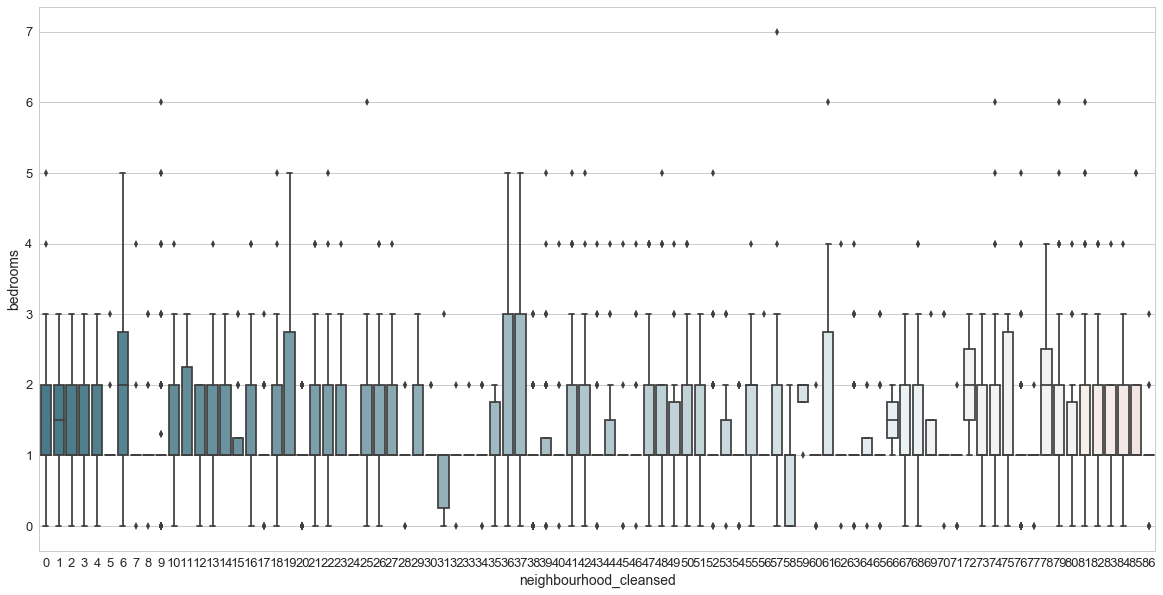

In [21]:
report_categorical_x_vs_numerical_y(x = 'neighbourhood_cleansed', y = 'bedrooms', df = df)

Optimization terminated successfully.
         Current function value: 0.197698
         Iterations 7
                              Results: Logit
Model:                  Logit               No. Iterations:      7.0000   
Dependent Variable:     beds                Pseudo R-squared:    0.002    
Date:                   2018-05-01 22:31    AIC:                 1683.6192
No. Observations:       3818                BIC:                 2227.1501
Df Model:               86                  Log-Likelihood:      -754.81  
Df Residuals:           3731                LL-Null:             -756.08  
Converged:              1.0000              Scale:               1.0000   
--------------------------------------------------------------------------
                           Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------
neighbourhood_cleansed_0  -1.9481   0.3617  -5.3859 0.0000 -2.6570 -1.2392
neighbourhood_cleansed_1  -1

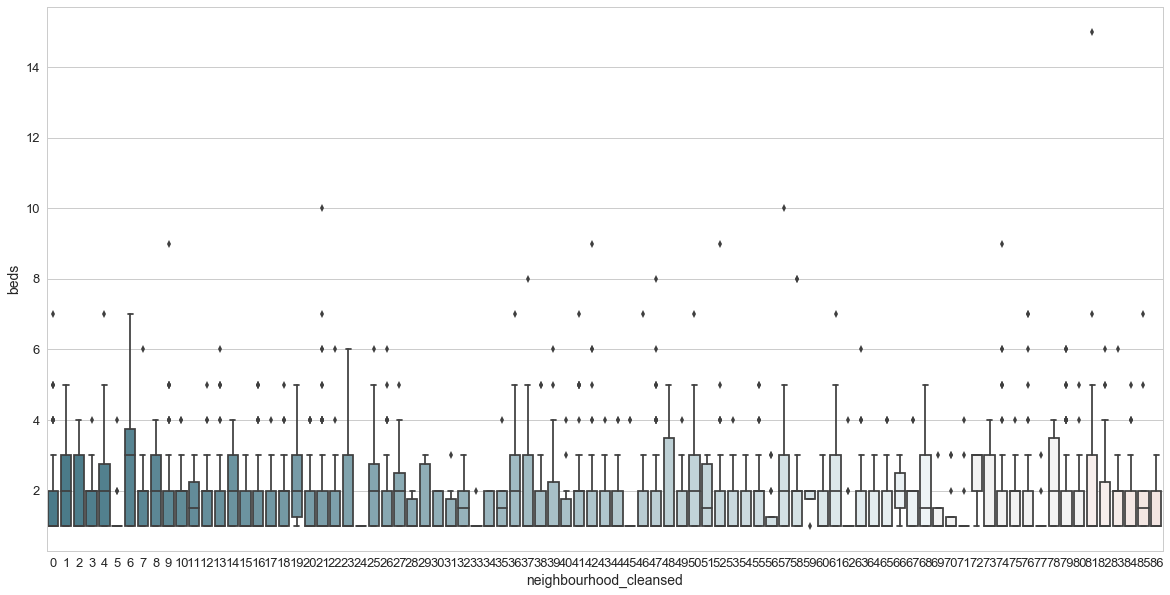

In [22]:
report_categorical_x_vs_numerical_y(x = 'neighbourhood_cleansed', y = 'beds', df = df)

Optimization terminated successfully.
         Current function value: 0.280514
         Iterations 6
                              Results: Logit
Model:                  Logit               No. Iterations:      6.0000   
Dependent Variable:     bathrooms           Pseudo R-squared:    0.003    
Date:                   2018-05-01 22:31    AIC:                 2316.0083
No. Observations:       3818                BIC:                 2859.5392
Df Model:               86                  Log-Likelihood:      -1071.0  
Df Residuals:           3731                LL-Null:             -1074.3  
Converged:              1.0000              Scale:               1.0000   
--------------------------------------------------------------------------
                           Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------
neighbourhood_cleansed_0  -1.6137   0.3212  -5.0245 0.0000 -2.2432 -0.9842
neighbourhood_cleansed_1  -1

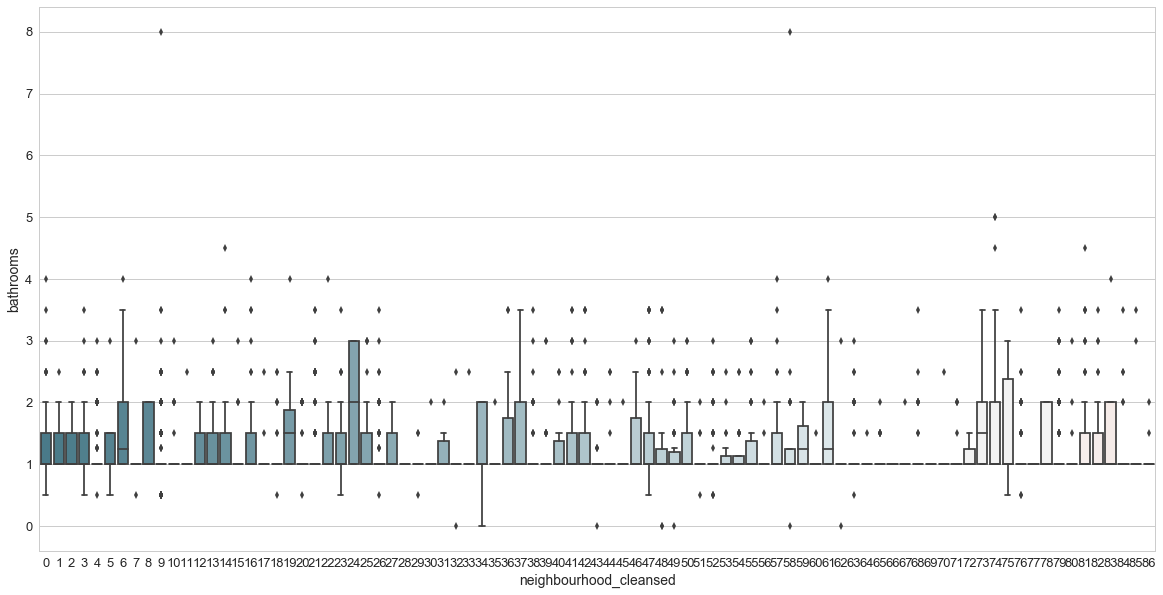

In [23]:
report_categorical_x_vs_numerical_y(x = 'neighbourhood_cleansed', y = 'bathrooms', df = df)

Optimization terminated successfully.
         Current function value: 0.389094
         Iterations 6
                              Results: Logit
Model:                  Logit               No. Iterations:      6.0000   
Dependent Variable:     accommodates        Pseudo R-squared:    0.007    
Date:                   2018-05-01 22:31    AIC:                 3145.1221
No. Observations:       3818                BIC:                 3688.6530
Df Model:               86                  Log-Likelihood:      -1485.6  
Df Residuals:           3731                LL-Null:             -1496.0  
Converged:              1.0000              Scale:               1.0000   
--------------------------------------------------------------------------
                           Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------
neighbourhood_cleansed_0  -1.3099   0.2922  -4.4833 0.0000 -1.8826 -0.7373
neighbourhood_cleansed_1  -1

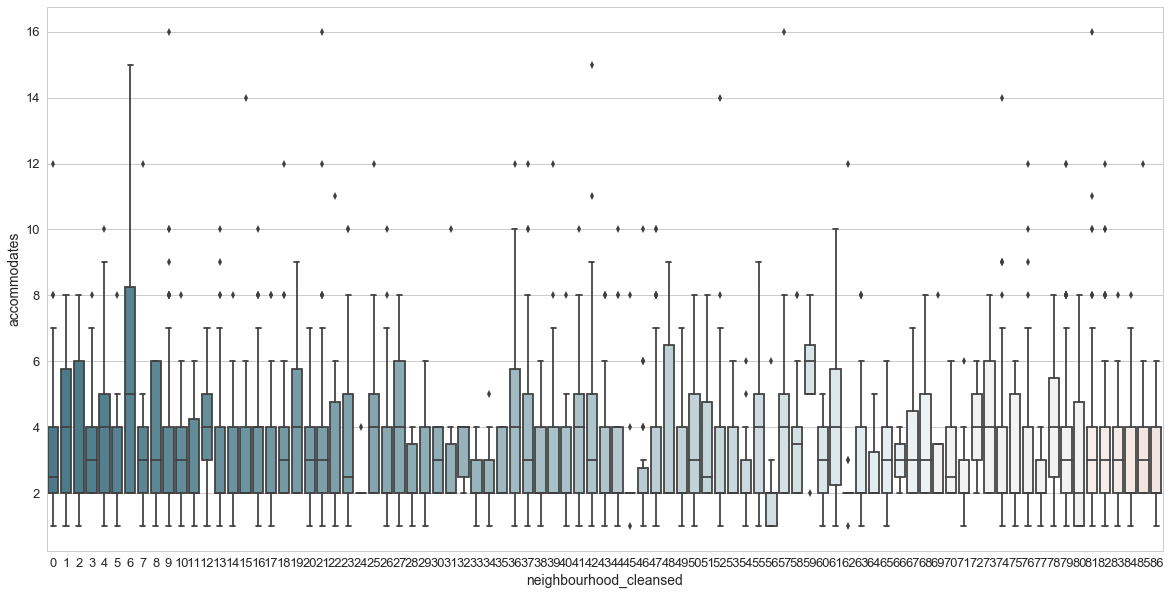

In [24]:
report_categorical_x_vs_numerical_y(x = 'neighbourhood_cleansed', y = 'accommodates', df = df)


Based on the above tests, the following independent variables are correlated:
1. bedrooms & bathrooms
2. bedrooms & beds.
3. bathrooms & beds.
4. beds & accommodates.
5. bedrooms & accommodates.
6. bathrooms & accommodates.
7. property & bedrooms.
8. property & beds.
9. property & bathromms.
10. property & accommodates.
11. neighbourhood_cleansed & bedrooms.
12. neighbourhood_cleansed & beds.
13. neighbourhood_cleansed & bathromms.
14. neighbourhood_cleansed & accommodates.

### Question 3: Are there strong correlation between an independent and a dependent variable? 

As we expected, independent variables, like accommodates, bedrooms, bathrooms & beds are correlate with dependent variable, listing price.

### Conclusion
In this notebook,
1. We explored the correlation between an independent and a dependent variable.
  - In this case, accommodates, bedrooms, beds, bathrooms do correlate with price with decreasing pearson correlation coefficient 0.65, 0.63, 0.59, 052, respectively.
  - property_type & neighbourhood_cleansed are also correlated with price.
2. We also explored correlation between pairs of independent variables.
  - For numerical variables, we check correlation by pearson correlation coefficient.
     - For example, beds correlates with accommodates with person correlation coefficient 0.86.
  - For categorical variable vs. numerical data, we use logitistic test.
     - For example, correlation between property_type_0 and accommodates has z-value -23.2678 and p-value 0.0.